## Evergreen data extraction and analysis
This notebook demonstrates how to extract historical wiredtiger performance data from evergreen and produce a simple chart as an example of custom analysis.

First, we can use the public REST APIs provided by both Evergreen and Cedar to gather historical data. No authentication is required for this process and documentation for how to use these APIs can be found [here](https://github.com/evergreen-ci/evergreen/wiki/REST-V1-Usage) for Evergreen and [here](https://github.com/evergreen-ci/cedar/wiki/Rest-V1-Usage) for Cedar.

**Note: This step may take a while to finish downloading data. Make sure you wait for this step to complete before moving onto the next one.**

In [1]:
import requests

# Get the last 100 builds from evergreen.
r = requests.get(f"https://evergreen.mongodb.com/rest/v1/projects/wiredtiger/versions?limit=100")
last_100_versions = [ v["version_id"] for v in r.json()["versions"] ]

# Get the performance results from these builds from Cedar.
last_100_versions_data = []
for version in last_100_versions:
    r = requests.get(f"https://cedar.mongodb.com/rest/v1/perf/version/{version}")

    if not r:
        # This will happen when perf data has not yet been collected for the build, or if the job failed.
        print(f"Warning: can't find details for `{version}`. Skipping these results")
        continue

    last_100_versions_data.append(r.json())

The data provided by Evergreen and Cedar is in `json` format, allowing for easy manipulation in Python.
In the example below the `Load time` results for `perf-test-long-btree` test have been extracted

In [2]:
data = []
for v in last_100_versions_data:
    for test in v:
        if test["info"]["task_name"] == "perf-test-long-btree":
            for stat in test["rollups"]["stats"]:
                if stat["name"] == "Load time":
                    data.append(stat["val"])

and a simple plot generated

99


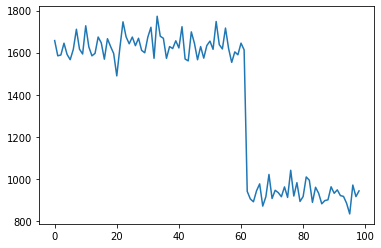

In [3]:
from matplotlib import pyplot as plt

print(len(data))
plt.plot(data)